In [1]:
from pycirclize import Circos
from pycirclize.utils import ColorCycler, load_eukaryote_example_dataset
import numpy as np
np.random.seed(0)

In [7]:
chr_bed_file = load_eukaryote_example_dataset("hg38")[0]
print(chr_bed_file)


C:\Users\pzxia\.cache\pycirclize\eukaryote\hg38\hg38_chr.bed


['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX', 'chrY']
['#ff0029ff', '#ff1200ff', '#ff4e00ff', '#ff8900ff', '#ffc400ff', '#feff00ff', '#c3ff00ff', '#87ff00ff', '#46ff00ff', '#0bff00ff', '#00ff30ff', '#00ff6cff', '#00ffa7ff', '#00ffe2ff', '#00e1ffff', '#00a5ffff', '#0064ffff', '#0028ffff', '#1400ffff', '#5000ffff', '#8b00ffff', '#c700ffff', '#ff00fbff', '#ff00bfff']


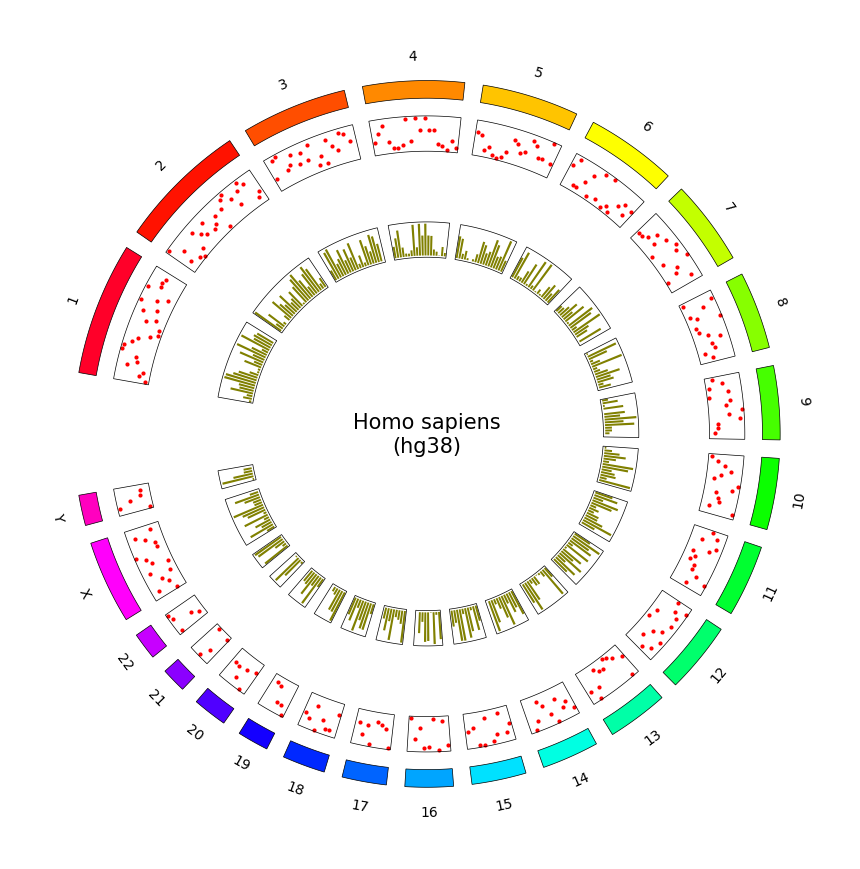

In [25]:

circos = Circos.initialize_from_bed(chr_bed_file, start=-80, end=260, space=3, endspace=False)
circos.text("Homo sapiens\n(hg38)", size=15)

ColorCycler.set_cmap("gist_rainbow")
chr_names = [s.name for s in circos.sectors]
print(chr_names)
colors = ColorCycler.get_color_list(len(chr_names))
print(colors)
chr_name2color = {name: color for name, color in zip(chr_names, colors)}

for sector in circos.sectors:
    # Plot chromosome outer track
    sector.text(sector.name.replace("chr", ""))
    color = chr_name2color[sector.name]
    outer_track = sector.add_track((95, 100))
    outer_track.axis(fc=color)
    # Create example x,y plot data
    step = 10000000
    x = np.arange(sector.start + (step / 2), sector.end - (step / 2), step)
    
    y = np.random.randint(0, 100, size=len(x))
    
    # Scatter track
    track1 = sector.add_track((80, 90), r_pad_ratio=0.1)
    track1.axis()
    track1.scatter(x, y, color="red")
    
    track3 = sector.add_track((50, 60), r_pad_ratio=0.1)
    track3.axis()
    track3.bar(x, y, width=step * 0.7, color="olive")
    
fig = circos.plotfig()

# read in AMP dataframe

In [141]:
import pandas as pd
file_path = './amp.csv'

data_with_log_q = pd.read_csv(file_path, usecols=['Chromosome', 'Wide peak start', 'Wide peak end', 'q values'])

# Apply log transformation to the 'q values' column

# Replacing 0 with a very small number before log transformation to avoid -inf values

data_with_log_q['q values'] = data_with_log_q['q values'].replace(0, np.finfo(float).tiny)

data_with_log_q['log10_q_values'] = np.log10(data_with_log_q['q values'])

data_with_log10 = data_with_log_q.drop(columns=['q values']).rename(
    columns={'Chromosome': 'chr', 'Wide peak start': 'start', 'Wide peak end': 'end', 'log10_q_values': 'qval'})


df = data_with_log10

# Calculate the distance for each row in df
df['dist'] = df['end'] - df['start']

# Determine the maximum distance for each chromosome and add it as a new column
df['max_distance'] = df.groupby('chr')['dist'].transform('max')

# Add the minimum start value for each chromosome to the DataFrame
df['min_start'] = df.groupby('chr')['start'].transform('min')

# Add the maximum end value for each chromosome to the DataFrame
df['max_end'] = df.groupby('chr')['end'].transform('max')

df['n_start'] = ((df['start'] - df['min_start']) * df['max_distance']) / (df['max_end'] - df['min_start'])
df['n_end'] = ((df['end'] - df['min_start']) * df['max_distance']) / (df['max_end'] - df['min_start'])

print(df[df["n_end"] > df["max_distance"]].count())

df.head()

chr             0
start           0
end             0
qval            0
dist            0
max_distance    0
min_start       0
max_end         0
n_start         0
n_end           0
dtype: int64


,chr,start,end,qval,dist,max_distance,min_start,max_end,n_start,n_end
0,chr1,39109153,41523062,-20.892790,2413909,5809617,1095521,247249719,8.971801e+05,9.541520e+05
1,chr1,148646436,149486905,-17.284833,840469,5809617,1095521,247249719,3.482428e+06,3.502264e+06
2,chr1,232526850,233617929,-6.061981,1091079,5809617,1095521,247249719,5.462135e+06,5.487886e+06
3,chr1,154088696,154329131,-8.411168,240435,5809617,1095521,247249719,3.610874e+06,3.616548e+06
4,chr1,36338557,36480225,-10.673664,141668,5809617,1095521,247249719,8.317898e+05,8.351333e+05


    chr      start        end       qval     dist  max_distance  min_start  \
0  chr1   39109153   41523062 -20.892790  2413909       5809617    1095521   
1  chr1  148646436  149486905 -17.284833   840469       5809617    1095521   
2  chr1  232526850  233617929  -6.061981  1091079       5809617    1095521   
3  chr1  154088696  154329131  -8.411168   240435       5809617    1095521   
4  chr1   36338557   36480225 -10.673664   141668       5809617    1095521   
5  chr1  178780208  178854243  -2.834815    74035       5809617    1095521   
6  chr1  241440102  247249719  -3.302326  5809617       5809617    1095521   
7  chr1    1095521    1467046  -1.768123   371525       5809617    1095521   

     max_end       n_start         n_end  
0  247249719  8.971801e+05  9.541520e+05  
1  247249719  3.482428e+06  3.502264e+06  
2  247249719  5.462135e+06  5.487886e+06  
3  247249719  3.610874e+06  3.616548e+06  
4  247249719  8.317898e+05  8.351333e+05  
5  247249719  4.193631e+06  4.195379e+0

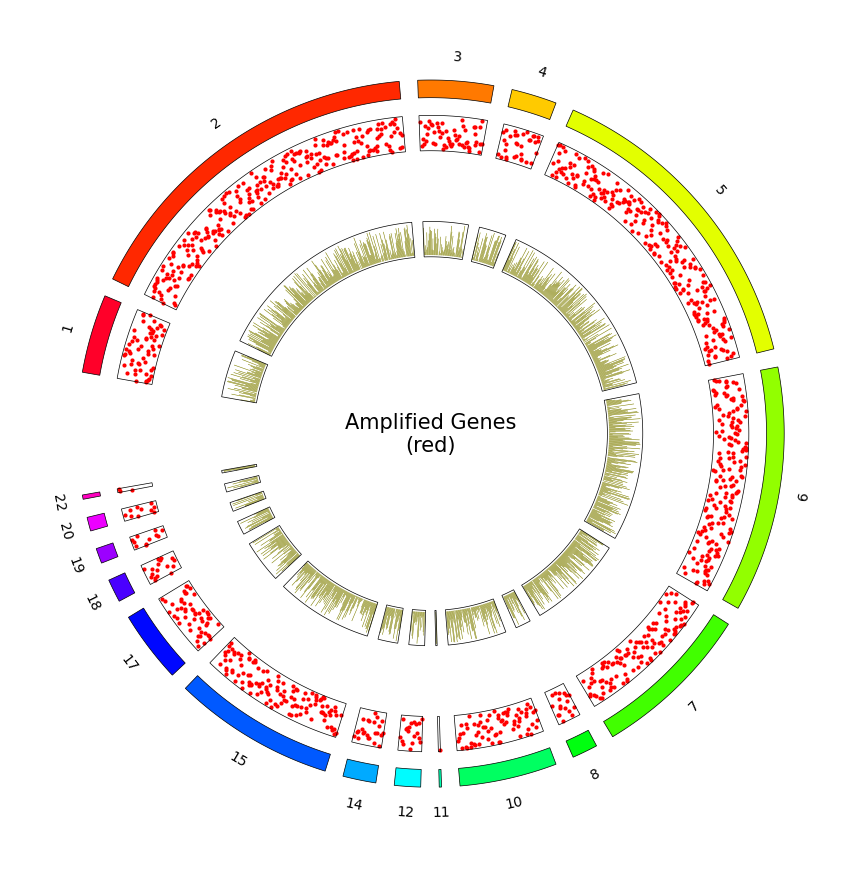

In [142]:
chr_bed_file = './dist_amp.bed'  # You would replace this with your actual BED file path
circos = Circos.initialize_from_bed(chr_bed_file, start=-80, end=260, space=3, endspace=False)
circos.text("Amplified Genes\n(red)", size=15)


ColorCycler.set_cmap("gist_rainbow")
chr_names = [s.name for s in circos.sectors]
colors = ColorCycler.get_color_list(len(chr_names))
chr_name2color = {name: color for name, color in zip(chr_names, colors)}


p = True
for sector in circos.sectors:
    # print(sector.name)
    # Plot chromosome outer track
    sector.text(sector.name.replace("chr", ""))
    color = chr_name2color[sector.name]
    outer_track = sector.add_track((95, 100))
    outer_track.axis(fc=color)
    
    step = 100000
    x = np.arange(sector.start + (step / 2), sector.end - (step / 2), step)
    y = np.random.randint(0, 100, size=len(x))
    
    if p == True:
        # print("x",x)
        # print("y",y)
        cur_df = df[df["chr"] == sector.name]
        print(cur_df)
        tx = np.concatenate([np.linspace(row['n_start'], row['n_end'], 5) for index, row in cur_df.iterrows()])
        ty = np.concatenate([[row['qval']] * 5 for index, row in cur_df.iterrows()])
        print(tx)
        # print(ty)
        # print(len(tx), len(ty))
        p = False
    
    track1 = sector.add_track((80, 90), r_pad_ratio=0.1)
    track1.axis()
    track1.scatter(x, y, color="red")
    
    track3 = sector.add_track((50, 60), r_pad_ratio=0.1)
    track3.axis()
    track3.bar(x, y, width=step * 0.7, color="olive")
    


fig = circos.plotfig()

            tx        ty
0     0.000000 -1.768123
1  2192.140103 -1.768123
2  4384.280206 -1.768123
3  6576.420309 -1.768123
4  8768.560412 -1.768123
             tx        ty
0      0.000000 -1.290654
1  15454.146157 -1.290654
2  30908.292314 -1.290654
3  46362.438470 -1.290654
4  61816.584627 -1.290654
             tx        ty
0      0.000000 -4.310691
1   3457.470488 -4.310691
2   6914.940975 -4.310691
3  10372.411463 -4.310691
4  13829.881951 -4.310691
            tx        ty
0     0.000000 -4.782516
1   718.956319 -4.782516
2  1437.912638 -4.782516
3  2156.868958 -4.782516
4  2875.825277 -4.782516
              tx        ty
0       0.000000 -8.154282
1  154131.788764 -8.154282
2  308263.577529 -8.154282
3  462395.366293 -8.154282
4  616527.155058 -8.154282
             tx       ty
0  0.000000e+00 -5.25649
1  8.125635e+05 -5.25649
2  1.625127e+06 -5.25649
3  2.437690e+06 -5.25649
4  3.250254e+06 -5.25649
              tx        ty
0       0.000000 -4.568636
1   90877.799285 -4.56

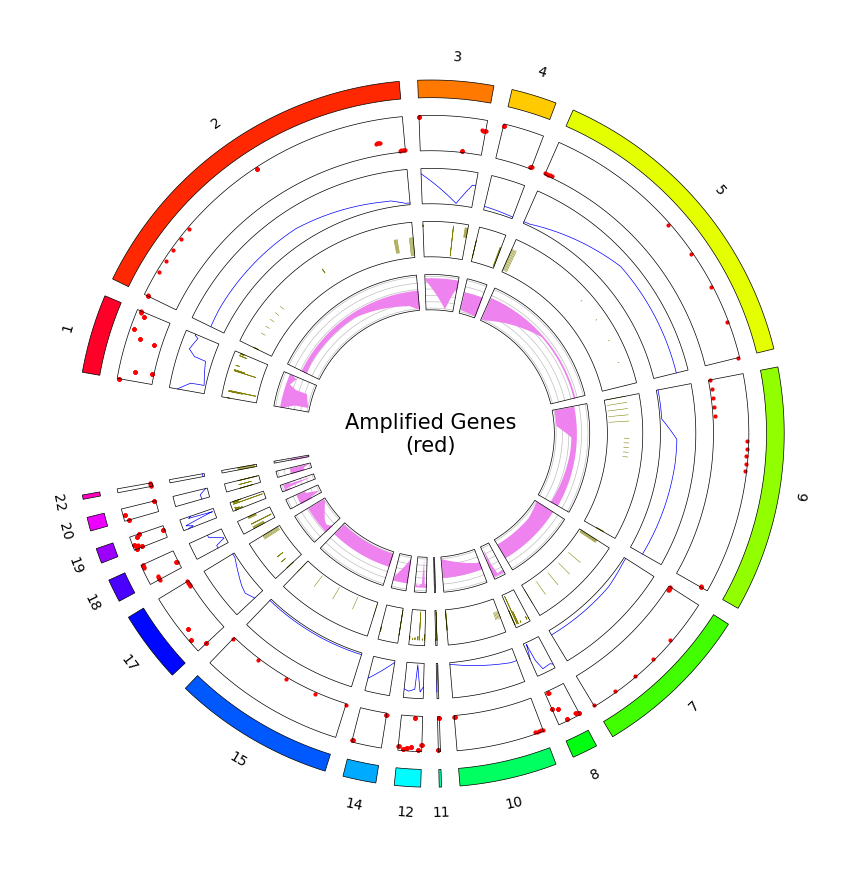

In [161]:
chr_bed_file = './dist_amp.bed'  # You would replace this with your actual BED file path
circos = Circos.initialize_from_bed(chr_bed_file, start=-80, end=260, space=3, endspace=False)
circos.text("Amplified Genes\n(red)", size=15)


ColorCycler.set_cmap("gist_rainbow")
chr_names = [s.name for s in circos.sectors]
colors = ColorCycler.get_color_list(len(chr_names))
chr_name2color = {name: color for name, color in zip(chr_names, colors)}


for sector in circos.sectors:
    # print(sector.name)
    # Plot chromosome outer track
    sector.text(sector.name.replace("chr", ""))
    color = chr_name2color[sector.name]
    outer_track = sector.add_track((95, 100))
    outer_track.axis(fc=color)
    
    # print("x",x)
    # print("y",y)
    cur_df = df[df["chr"] == sector.name]
    # print(cur_df)
    tx = np.concatenate([np.linspace(row['n_start'], row['n_end'], 5) for index, row in cur_df.iterrows()])
    ty = np.concatenate([[row['qval']] * 5 for index, row in cur_df.iterrows()])
    
    data = {
        'tx': tx,
        'ty': ty
    }
    df_tx_ty = pd.DataFrame(data)

    df_tx_ty_sorted = df_tx_ty.sort_values(by='tx').reset_index(drop=True)
    
    tx = df_tx_ty_sorted['tx'].values
    ty = df_tx_ty_sorted['ty'].values
    
    print(df_tx_ty_sorted.head())
    # print(tx)
    # print(ty)
    # print(len(tx), len(ty))
    
    track1 = sector.add_track((80, 90), r_pad_ratio=0.1)
    track1.axis()
    min_qval = cur_df['qval'].min()  # Find the minimum qval in your data
    max_qval = cur_df['qval'].max()  
    track1.scatter(tx, ty, vmin=min_qval, vmax=max_qval, color="red")
    
    track2 = sector.add_track((65, 75), r_pad_ratio=0.1)
    track2.axis()
    track2.line(tx, ty, vmin=min_qval, vmax=3, color="blue")
    
    track3 = sector.add_track((50, 60), r_pad_ratio=0.1)
    track3.axis()
    track3.bar(tx, ty, vmin=min_qval, vmax=3, width=step * 0.7, color="olive")
    
    
    track4 = sector.add_track((35, 45), r_pad_ratio=0.1)
    track4.axis()
    track4.grid()
    track4.fill_between(tx, ty,vmin=min_qval, vmax=3, color="violet")
    


fig = circos.plotfig()

# start fresh

In [1]:

circos = Circos.initialize_from_bed(chr_bed_file, start=-80, end=260, space=3, endspace=False)
circos.text("Homo sapiens\n(hg38)", size=15)

ColorCycler.set_cmap("gist_rainbow")
chr_names = [s.name for s in circos.sectors]
print(chr_names)
colors = ColorCycler.get_color_list(len(chr_names))
print(colors)
chr_name2color = {name: color for name, color in zip(chr_names, colors)}

for sector in circos.sectors:
    # Plot chromosome outer track
    sector.text(sector.name.replace("chr", ""))
    color = chr_name2color[sector.name]
    outer_track = sector.add_track((95, 100))
    outer_track.axis(fc=color)
    # Create example x,y plot data
    step = 10000000
    x = np.arange(sector.start + (step / 2), sector.end - (step / 2), step)
    
    y = np.random.randint(0, 100, size=len(x))
    
    # Scatter track
    track1 = sector.add_track((80, 90), r_pad_ratio=0.1)
    track1.axis()
    track1.scatter(x, y, color="red")
    
    track3 = sector.add_track((50, 60), r_pad_ratio=0.1)
    track3.axis()
    track3.bar(x, y, width=step * 0.7, color="olive")
    
fig = circos.plotfig()

NameError: name 'Circos' is not defined